<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Code-Setup" data-toc-modified-id="Code-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Code Setup</a></span><ul class="toc-item"><li><span><a href="#Acronyms-and-abbreviations" data-toc-modified-id="Acronyms-and-abbreviations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Acronyms and abbreviations</a></span></li></ul></li><li><span><a href="#Establish-Data-Frames" data-toc-modified-id="Establish-Data-Frames-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Establish Data Frames</a></span><ul class="toc-item"><li><span><a href="#Read-in-feature-data" data-toc-modified-id="Read-in-feature-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read in feature data</a></span></li><li><span><a href="#Read-in-WF-data" data-toc-modified-id="Read-in-WF-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read in WF data</a></span><ul class="toc-item"><li><span><a href="#WF-ENM" data-toc-modified-id="WF-ENM-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>WF ENM</a></span></li><li><span><a href="#WF-Source" data-toc-modified-id="WF-Source-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>WF Source</a></span></li></ul></li><li><span><a href="#Data-frames" data-toc-modified-id="Data-frames-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data frames</a></span><ul class="toc-item"><li><span><a href="#ENM-&amp;-100%-organics" data-toc-modified-id="ENM-&amp;-100%-organics-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>ENM &amp; 100% organics</a></span></li><li><span><a href="#ENM-&amp;-10%-organics" data-toc-modified-id="ENM-&amp;-10%-organics-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>ENM &amp; 10% organics</a></span></li><li><span><a href="#ENM-&amp;-2%-organics" data-toc-modified-id="ENM-&amp;-2%-organics-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>ENM &amp; 2% organics</a></span></li><li><span><a href="#ENM-&amp;-1%-matching-organics" data-toc-modified-id="ENM-&amp;-1%-matching-organics-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>ENM &amp; 1% matching organics</a></span></li></ul></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#ENM-only" data-toc-modified-id="ENM-only-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ENM only</a></span></li><li><span><a href="#Essentially-leave-one-out-cross-validation,-slight-biases,-might-be-overfitting" data-toc-modified-id="Essentially-leave-one-out-cross-validation,-slight-biases,-might-be-overfitting-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Essentially leave one out cross validation, slight biases, might be overfitting</a></span></li><li><span><a href="#100%-organics" data-toc-modified-id="100%-organics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>100% organics</a></span></li><li><span><a href="#10%-organics-with-source-bins-=-ENM-bins" data-toc-modified-id="10%-organics-with-source-bins-=-ENM-bins-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>10% organics with source bins = ENM bins</a></span></li><li><span><a href="#10%-organics-with-custom-WF-bins" data-toc-modified-id="10%-organics-with-custom-WF-bins-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>10% organics with custom WF bins</a></span></li><li><span><a href="#2%-organics" data-toc-modified-id="2%-organics-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>2% organics</a></span></li><li><span><a href="#1%-matching-organics" data-toc-modified-id="1%-matching-organics-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>1% matching organics</a></span></li></ul></li></ul></div>

Summary:
* Established a new script for the final models


# Code Setup

In [14]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

In [15]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [16]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [17]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "BLTfigs"

In [18]:
import os
#os.chdir(path)
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory did not exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.')

Figure directory exists.


In [19]:
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf')

In [20]:
# To enable a specified sound to play
from IPython.display import Audio
sound_file = './data/Glass.wav'

# Add the following to the end of a cell with a long run time
# Play sound when cell is done running
Audio(url=sound_file, autoplay=True)

In [21]:
# Shift tab to understand function components
# Type questionmark before function to bring up help

## Acronyms and abbreviations

In [22]:
# arr = array
# df = dataframe
# enm = engineered nanomaterial
# mw = molecular weight
# NOC = not otherwise categorizable
# oecd = Organisation for Economic Co-operation and Development
# prop = property
# PUC = product use category
# wf = weight fraction

# Establish Data Frames

## Read in feature data

In [226]:
# Target (ENM) model data
X_enm = pd.read_csv("./data/XX_enm.csv", sep='\t', header='infer', index_col=0)
X_enm.head(4)

,propMW,propMP,propBP,propLogDensity,0,1,2,3,4,5,...,group_facialcleansingandmoisturizing,group_fungicide,group_generalhouseholdcleaning,group_generalmoisturizing,group_makeupandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers,refined_spray,matrix_F
0,79.867,1843.00,2972.0,0.626340,0.5,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,1
1,63.546,1083.00,2567.0,0.952308,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,65.370,419.53,907.0,0.853698,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,107.868,961.78,2162.0,1.014730,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [227]:
# Source (organics) model data
X_source = pd.read_csv("./data/XX_source.csv", sep='\t', header='infer', index_col=0)
X_source.head(4)

,propMW,propMP,propBP,propLogDensity,0,1,2,3,4,5,...,group_facialcleansingandmoisturizing,group_fungicide,group_generalhouseholdcleaning,group_generalmoisturizing,group_makeupandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers,refined_spray,matrix_F
1,106.168,-52.5218,147.1505,-0.05061,0.5,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,106.168,-52.5218,147.1505,-0.05061,0.5,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,106.168,-52.5218,147.1505,-0.05061,0.5,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,1
4,106.168,-52.5218,147.1505,-0.05061,0.5,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,1


In [228]:
print(X_source.shape)

(16354, 39)


## Read in WF data

### WF ENM

In [352]:
# Read in ENM maximum_weight_fraction data
y_enm = pd.read_csv("./data/ENM_conc_export.csv", sep=',', header='infer', usecols=[3])

In [353]:
# Define function to assign weight fractions to bins per Isaacs et al. 2016
def bins(row):
    if row['maximum_weight_fraction'] <= 0.002:
        val = 'bottom'
    elif row['maximum_weight_fraction'] > 0.05:
        val = 'top'
    else:
        val = 'middle'
    return val
bin_enm = y_enm.apply(bins, axis=1)

Text(0.5,1,'Frequency of ENM Weight Fraction Bins (Custom)')

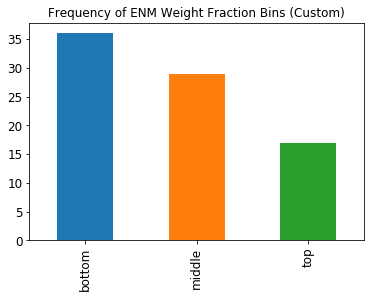

In [354]:
bin_enm.value_counts().plot(kind='bar')
plt.title('Frequency of ENM Weight Fraction Bins (Custom)')

Text(0.5,1,'Frequency of ENM Weight Fraction Bins')

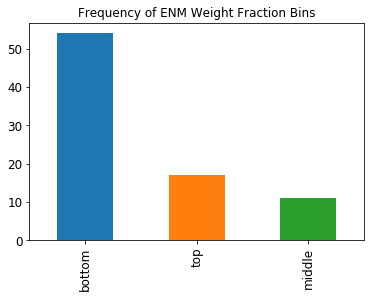

In [340]:
bin_enm.value_counts().plot(kind='bar')
plt.title('Frequency of ENM Weight Fraction Bins (Isaacs)')

In [355]:
# Use label encoder to make bins compatible with Scikit-Learn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Fit the encoder and transform categories into integers
bin_enm = le.fit_transform(bin_enm)

### WF Source

In [366]:
# Read in organics maximum_weight_fraction data
y_source = pd.read_csv("./data/y_source.csv", sep=',', header='infer')

In [367]:
# Define function to assign weight fractions to bins per Isaacs et al. 2016
def bins_Isaacs(row):
    if row['maximum_weight_fraction'] <= 0.01:
        val = 'bottom'
    elif row['maximum_weight_fraction'] > 0.05:
        val = 'top'
    else:
        val = 'middle'
    return val
bin_source = y_source.apply(bins_Isaacs, axis=1)

Text(0.5,1,'Frequency of Organics Weight Fraction Bins (Isaacs)')

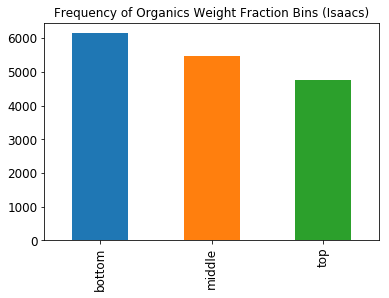

In [368]:
bin_source.value_counts().plot(kind='bar')
plt.title('Frequency of Organics Weight Fraction Bins (Isaacs)')

Text(0.5,1,'Frequency of Organics Weight Fraction Bins (ENM)')

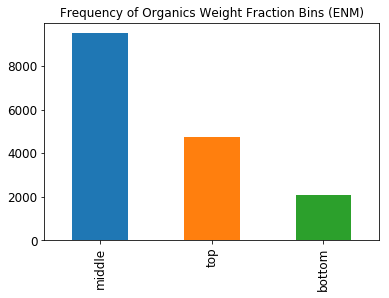

In [358]:
bin_source.value_counts().plot(kind='bar')
plt.title('Frequency of Organics Weight Fraction Bins (ENM)')

In [369]:
# Use label encoder to make bins compatible with Scikit-Learn
bin_source = le.fit_transform(bin_source)

## Data frames

### ENM & 100% organics

In [253]:
# ENM and all organics data stacked, respectively
X_all = pd.concat([X_enm, X_source], sort=False)
bin_all = np.concatenate([bin_enm, bin_source])

In [254]:
X_all.head(4)

,propMW,propMP,propBP,propLogDensity,0,1,2,3,4,5,...,group_facialcleansingandmoisturizing,group_fungicide,group_generalhouseholdcleaning,group_generalmoisturizing,group_makeupandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers,refined_spray,matrix_F
0,79.867,1843.00,2972.0,0.626340,0.5,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,1
1,63.546,1083.00,2567.0,0.952308,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,65.370,419.53,907.0,0.853698,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,107.868,961.78,2162.0,1.014730,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [255]:
bin_all[80:100,]

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0])

### ENM & 10% organics

In [370]:
# Randomly sample 10% of organics data
X_ten = X_source.reset_index(drop=True).sample(frac=0.1, replace=False, random_state=38, axis=0)
idx = X_ten.index.tolist()

bin_ten = pd.DataFrame(bin_source)
bin_ten = bin_ten.loc[bin_ten.index[idx]]

print(X_ten.shape)
print(bin_ten.shape)

(1635, 39)
(1635, 1)


In [371]:
# Append sampled organics data to ENM data
X_ten = pd.concat([X_enm, X_ten], sort=False)

bin_ten = pd.concat([pd.DataFrame(bin_enm), bin_ten], sort=False)
bin_ten.columns = ['maximum_weight_fraction']
bin_ten = bin_ten.values.ravel()

print(X_ten.shape)
print(bin_ten.shape)
print(type(bin_ten))

(1717, 39)
(1717,)
<class 'numpy.ndarray'>


In [372]:
X_ten.iloc[80:85,:]

,propMW,propMP,propBP,propLogDensity,0,1,2,3,4,5,...,group_facialcleansingandmoisturizing,group_fungicide,group_generalhouseholdcleaning,group_generalmoisturizing,group_makeupandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers,refined_spray,matrix_F
80,79.867,1843.000000,2972.0000,0.626340,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,1,1
81,107.868,961.780000,2162.0000,1.014730,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
14954,72.107,-66.158800,78.8506,-0.057000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,1
2145,270.457,3.531835,303.6770,-0.078834,0.0,0.0,0.5,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
2263,104.149,-10.558055,222.9220,0.009451,0.0,0.0,0.5,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


### ENM & 2% organics

In [322]:
# Randomly sample 2% of organics data
X_two = X_source.reset_index(drop=True).sample(n=328, replace=False, random_state=28, axis=0)
idx = X_two.index.tolist()

bin_two = pd.DataFrame(bin_source)
bin_two = bin_two.loc[bin_two.index[idx]]

print(X_two.shape)
print(bin_two.shape)

(328, 39)
(328, 1)


In [323]:
# Append sampled organics data to ENM data
X_two = pd.concat([X_enm, X_two], sort=False)

bin_two = pd.concat([pd.DataFrame(bin_enm), bin_two], sort=False)
bin_two.columns = ['maximum_weight_fraction']
bin_two = bin_two.values.ravel()

print(X_two.shape)
print(bin_two.shape)

(410, 39)
(410,)


In [324]:
X_two.iloc[80:85,:]

,propMW,propMP,propBP,propLogDensity,0,1,2,3,4,5,...,group_facialcleansingandmoisturizing,group_fungicide,group_generalhouseholdcleaning,group_generalmoisturizing,group_makeupandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers,refined_spray,matrix_F
80,79.867,1843.00000,2972.0000,0.626340,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,1,1
81,107.868,961.78000,2162.0000,1.014730,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
1336,62.068,-8.48790,172.8605,0.013259,0.5,0.0,0.5,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
16010,122.127,141.62100,291.4530,0.072250,0.0,0.0,0.5,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
8704,281.093,40.06515,276.2420,0.198657,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1


### ENM & 1% matching organics

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_similarity_score.html
* https://stackoverflow.com/questions/28910089/filling-empty-python-dataframe-using-loops

In [ ]:
# Write loop to match organics tuples to ENM tuples based on Jaccard similarity
X_match = []
for i in X_enm.index:
    # Find most similar tuple in X_source
    #tuple_match = pd.DataFrame()
    X_match.append(tuple_match)

In [ ]:
# Append sampled organics data to ENM data
X_match = pd.concat([X_enm, X_match], sort=False)

# Models

## ENM only

Here I make use of a helper class in order to compare different model estimators with different parameters. Estimator Selection Helper is by David Batista:
http://www.davidsbatista.net/blog/2018/02/23/model_optimization/.

In [126]:
# Scale pchem properties since pipelines are not included in the helper.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_enm_scaled = scaler.fit_transform(X_enm)

In [118]:
# Set up for grid search across multiple pipelines
from sklearn.model_selection import GridSearchCV

cv=10
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=cv, n_jobs=1, verbose=1, scoring='accuracy', refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [135]:
# Define sets of models and their respective parameters to compare
# The first dictionary contains the models to be scored
# while the second contains the parameters for each model

from sklearn.cluster import FeatureAgglomeration
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

cv=10
models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC()
}

params = {
    'RandomForest': { 'n_estimators': [8,12,16,20,24]},
    'SVC': [
        {'kernel': ['linear'], 'C': np.logspace(0,4,10)},
        {'kernel': ['rbf'], 'C': np.logspace(0,4,10), 'gamma': np.logspace(-6,0,10)},
    ]
}

In [136]:
# Fit gridsearch models to select best estimator
helper = EstimatorSelectionHelper(models, params)
helper.fit(X_enm_scaled, bin_enm, n_jobs=3)

# Play sound when cell is done running
Audio(url=sound_file, autoplay=True)

Running GridSearchCV for RandomForest.
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Running GridSearchCV for SVC.
Fitting 10 folds for each of 110 candidates, totalling 1100 fits


[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Done 1100 out of 1100 | elapsed:    1.0s finished


In [137]:
# Compare performance for estimators (accuracy)
# Function features only
helper.score_summary(sort_by='mean_score')

RandomForest
SVC


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,n_estimators
2,RandomForest,0.333333,0.630754,0.857143,0.145799,NaN,NaN,NaN,16
99,SVC,0.333333,0.622817,0.857143,0.190713,3593.81,0.000464159,rbf,NaN
6,SVC,0.333333,0.622817,0.857143,0.190713,2.78256,NaN,linear,NaN
71,SVC,0.333333,0.611706,0.857143,0.191071,166.81,0.01,rbf,NaN
1,RandomForest,0.333333,0.610913,0.857143,0.14718,NaN,NaN,NaN,12
108,SVC,0.333333,0.608532,0.857143,0.177519,10000,0.0001,rbf,NaN
80,SVC,0.333333,0.608532,0.857143,0.177519,464.159,0.00215443,rbf,NaN
52,SVC,0.333333,0.597421,0.857143,0.177009,21.5443,0.0464159,rbf,NaN
23,SVC,0.333333,0.590476,0.888889,0.188956,1,0.215443,rbf,NaN
3,RandomForest,0.333333,0.58869,0.777778,0.156477,NaN,NaN,NaN,20


## Essentially leave one out cross validation, slight biases, might be overfitting

This runs just the ENM data using an SVC, optimizing parameters with a grid search using cross-validation.

In [378]:
# SVR-RBF with all features, normalized
    # ENM weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight='balanced')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(1,3,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(X_enm+0.00001,bin_enm)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.scoring)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 297.63514416313194, 'estimator__gamma': 0.002976351441631316}
0.6219512195121951
accuracy


In [379]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf',class_weight='balanced', 
                      C=297.63514416313194, 
                      gamma=0.002976351441631316))
     ])

In [380]:
# Make a confusion matrix function to summarize accuracy across labels
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[30  3  3]
 [10 15  4]
 [ 4  2 11]]
Normalized confusion matrix
[[0.83 0.08 0.08]
 [0.34 0.52 0.14]
 [0.24 0.12 0.65]]


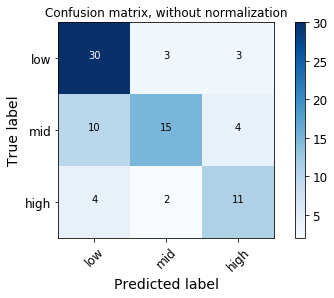

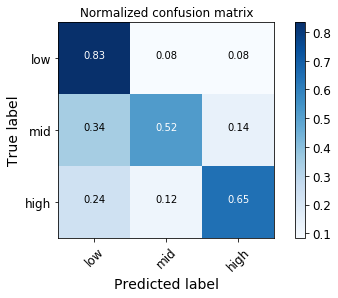

In [386]:
# Cross-validation for confusion matrix
from sklearn import model_selection

X=np.array(X_enm)
y=np.array(bin_enm)

kfold = model_selection.StratifiedKFold(n_splits=17,shuffle=True, random_state=24)
cnf_matrix2=np.zeros([3,3])

for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bestpipe.fit(X_train,y_train)
    y_enm_predict=bestpipe.predict(X_test)
    y[test_index]=y_enm_predict
    cnf_matrix2+= confusion_matrix(y_test, y_enm_predict);
    
# Set confusion matrix
cnf_matrix=cnf_matrix2.astype(np.int)
cnf_matrix = confusion_matrix(bin_enm, y)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
fig.savefig('./BLTfigs/confusion_notnorm_enm_only.png')

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
fig.savefig('./BLTfigs/confusion_norm_enm_only.png')
plt.show()

## 100% organics

In [84]:
# TODO: Rerun with gamma_set=np.logspace(-6,0,6)
# SVC-RBF with all features, normalized
    # ENM weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight='balanced')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(0,4,6)
gamma_set=np.logspace(-5,0,6)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(X_all+0.00001,bin_all)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 6.309573444801933, 'estimator__gamma': 1e-05}
0.49202969092236554


In [160]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf',class_weight='balanced', 
                      C=6.309573444801933, 
                      gamma=1e-05))
     ])
bestpipe.fit(X_all,bin_all)

Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('estimator', SVC(C=6.309573444801933, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Confusion matrix, without normalization
[[ 6 15 15]
 [ 5 11 13]
 [ 4  7  6]]
Normalized confusion matrix
[[0.17 0.42 0.42]
 [0.17 0.38 0.45]
 [0.24 0.41 0.35]]


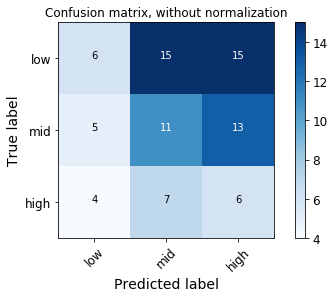

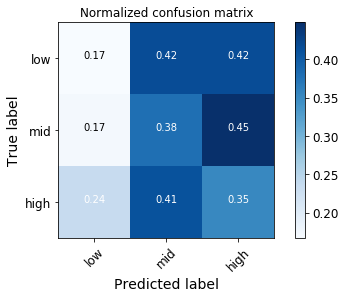

In [161]:
# Cross-validation for confusion matrix
from sklearn import model_selection

X=np.array(X_enm)
y=np.array(bin_enm)

kfold = model_selection.StratifiedKFold(n_splits=17,shuffle=True, random_state=24)
cnf_matrix2=np.zeros([3,3])

for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bestpipe.fit(X_train,y_train)
    y_enm_predict=bestpipe.predict(X_test)
    y[test_index]=y_enm_predict
    cnf_matrix2+= confusion_matrix(y_test, y_enm_predict);
    
# Set confusion matrix
cnf_matrix=cnf_matrix2.astype(np.int)
cnf_matrix = confusion_matrix(bin_enm, y)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
fig.savefig('./BLTfigs/confusion_notnorm_mix_100.png')

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
fig.savefig('./BLTfigs/confusion_norm_mix_100.png')
plt.show()

## 10% organics with source bins = ENM bins

Ran with a slightly larger parameter grid for optimizing.

In [363]:
# SVC-RBF with all features, normalized
    # ENM weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight='balanced')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(0,4,16)
gamma_set=np.logspace(-6,0,16)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(X_ten+0.00001,bin_ten)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 10000.0, 'estimator__gamma': 0.39810717055349776}
0.6948165404775771


In [364]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf',class_weight='balanced', 
                      C=4328.7612810830615, 
                      gamma=1.0))
     ])
bestpipe.fit(X_ten,bin_ten)

Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('estimator', SVC(C=4328.7612810830615, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Confusion matrix, without normalization
[[22 11  3]
 [ 7 19  3]
 [10  3  4]]
Normalized confusion matrix
[[0.61 0.31 0.08]
 [0.24 0.66 0.1 ]
 [0.59 0.18 0.24]]


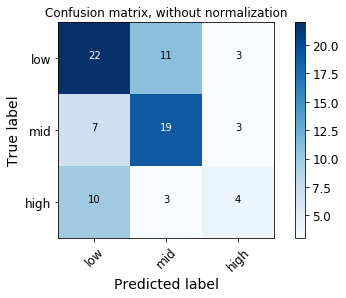

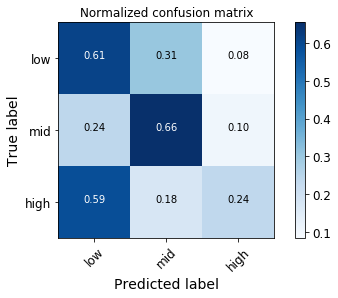

In [365]:
# Cross-validation for confusion matrix
from sklearn import model_selection

X=np.array(X_enm)
y=np.array(bin_enm)

kfold = model_selection.StratifiedKFold(n_splits=17,shuffle=True, random_state=24)
cnf_matrix2=np.zeros([3,3])

for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bestpipe.fit(X_train,y_train)
    y_enm_predict=bestpipe.predict(X_test)
    y[test_index]=y_enm_predict
    cnf_matrix2+= confusion_matrix(y_test, y_enm_predict);
    
# Set confusion matrix
cnf_matrix=cnf_matrix2.astype(np.int)
cnf_matrix = confusion_matrix(bin_enm, y)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## 10% organics with custom WF bins

In [373]:
# SVC-RBF with all features, normalized
    # ENM weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight='balanced')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(0,4,16)
gamma_set=np.logspace(-6,0,16)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(X_ten+0.00001,bin_ten)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 857.6958985908938, 'estimator__gamma': 1.0}
0.6557949912638322


In [376]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf',class_weight='balanced', 
                      C=857.6958985908938, 
                      gamma=1.0))
     ])
bestpipe.fit(X_ten,bin_ten)

Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('estimator', SVC(C=857.6958985908938, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Confusion matrix, without normalization
[[22 11  3]
 [ 7 19  3]
 [10  3  4]]
Normalized confusion matrix
[[0.61 0.31 0.08]
 [0.24 0.66 0.1 ]
 [0.59 0.18 0.24]]


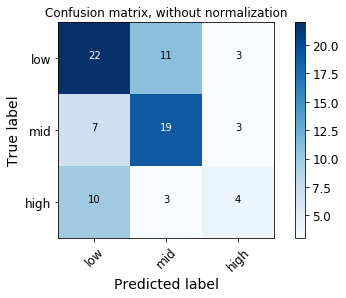

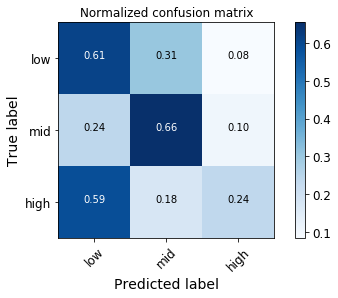

In [377]:
# Cross-validation for confusion matrix
from sklearn import model_selection

X=np.array(X_enm)
y=np.array(bin_enm)

kfold = model_selection.StratifiedKFold(n_splits=17,shuffle=True, random_state=24)
cnf_matrix2=np.zeros([3,3])

for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bestpipe.fit(X_train,y_train)
    y_enm_predict=bestpipe.predict(X_test)
    y[test_index]=y_enm_predict
    cnf_matrix2+= confusion_matrix(y_test, y_enm_predict);
    
# Set confusion matrix
cnf_matrix=cnf_matrix2.astype(np.int)
cnf_matrix = confusion_matrix(bin_enm, y)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## 2% organics

In [387]:
# SVC-RBF with all features, normalized
    # ENM weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight='balanced')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(0,4,16)
gamma_set=np.logspace(-6,0,16)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(X_two+0.00001,bin_two)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 1584.893192461114, 'estimator__gamma': 0.003981071705534973}
0.551219512195122


In [388]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf',class_weight='balanced', 
                      C=1584.893192461114, 
                      gamma=0.003981071705534973))
     ])
bestpipe.fit(X_two,bin_two)

Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('estimator', SVC(C=1584.893192461114, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.003981071705534973,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

Confusion matrix, without normalization
[[24  6  6]
 [ 7 18  4]
 [ 3  3 11]]
Normalized confusion matrix
[[0.67 0.17 0.17]
 [0.24 0.62 0.14]
 [0.18 0.18 0.65]]


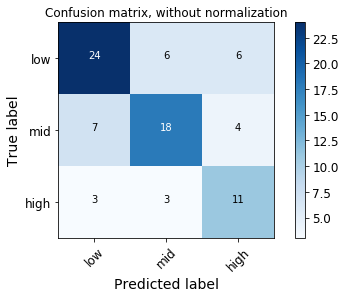

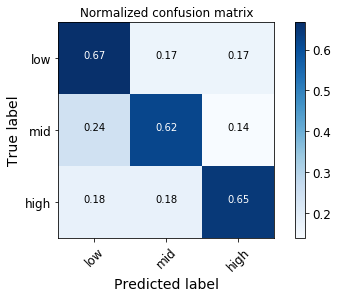

In [389]:
# Cross-validation for confusion matrix
from sklearn import model_selection

X=np.array(X_enm)
y=np.array(bin_enm)

kfold = model_selection.StratifiedKFold(n_splits=17,shuffle=True, random_state=24)
cnf_matrix2=np.zeros([3,3])

for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bestpipe.fit(X_train,y_train)
    y_enm_predict=bestpipe.predict(X_test)
    y[test_index]=y_enm_predict
    cnf_matrix2+= confusion_matrix(y_test, y_enm_predict);
    
# Set confusion matrix
cnf_matrix=cnf_matrix2.astype(np.int)
cnf_matrix = confusion_matrix(bin_enm, y)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## 1% matching organics

In [ ]:
# SVC-RBF with all features, normalized
    # ENM weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight='balanced')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(0,4,16)
gamma_set=np.logspace(-6,0,16)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(X_match+0.00001,bin_match)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

In [ ]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf',class_weight='balanced', 
                      C=6.309573444801933, 
                      gamma=1e-05))
     ])
bestpipe.fit(X_match,bin_match)

In [ ]:
# Cross-validation for confusion matrix
from sklearn import model_selection

X=np.array(X_match)
y=np.array(bin_match)

kfold = model_selection.StratifiedKFold(n_splits=17,shuffle=True, random_state=24)
cnf_matrix2=np.zeros([3,3])

for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bestpipe.fit(X_train,y_train)
    y_enm_predict=bestpipe.predict(X_test)
    y[test_index]=y_enm_predict
    cnf_matrix2+= confusion_matrix(y_test, y_enm_predict);
    
# Set confusion matrix
cnf_matrix=cnf_matrix2.astype(np.int)
cnf_matrix = confusion_matrix(bin_enm, y)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()